In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-tv-shows-and-movies/NetFlix.csv


## About Data

Show_ID-Id of the movie/TV show

type-Movie or TV show

title-Title of the movie/TV show

director-Director of the movie/TV show

Cast-actors/actress who have acted in the movie/TV show

country-Country the movie/TV show belongs to

date_added-Aired dated-Released date on netflix

release year-Original movie/TV show release date

rating-Rating of the movie/TV show

duration-Length of the movie

genre-Genre of the movie
 
Description-Summary of the movie

## Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/netflix-tv-shows-and-movies/NetFlix.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,01-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,08-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...


## Workflow
* Understanding of data
* Data cleaning
* Exploratory Data Analysis
* Insights

# Understanding of data


In [4]:
df.sample(5) ## Getting sample data 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
5031,s5527,Movie,"Sexo, Pudor y Lagrimas",Antonio Serrano,"Demián Bichir, Susana Zabaleta, Jorge Salinas,...",Mexico,15-Dec-17,1999,R,111,"Comedies, Dramas, International Movies",Passions flare and alliances form when neighbo...
6034,s643,Movie,Awe,Prasanth Varma,"Kajal Aggarwal, Nithya Menon, Regina Cassandra...",India,15-Feb-19,2018,TV-MA,111,"Dramas, International Movies, Sci-Fi & Fantasy","Disparate characters, including an aspiring ti..."
7023,s732,TV Show,Barbarians,NaN,"Laurence Rupp, Jeanne Goursaud, David Schütter...",Germany,23-Oct-20,2020,TV-MA,1,"International TV Shows, TV Action & Adventure,...",Torn between the mighty empire that raised him...
902,s1810,Movie,Don Quixote: The Ingenious Gentleman of La Mancha,"Mahin Ibrahim, Austin Kolodney, Will Lowell, D...","Carmen Argenziano, Horatio Sanz, Luis Guzman, ...",United States,05-Jan-18,2015,TV-14,83,"Comedies, Independent Movies",In this modern adaptation of a Spanish classic...
3473,s4124,Movie,Mirai,Mamoru Hosoda,"Moka Kamishiraishi, Haru Kuroki, Gen Hoshino, ...",Japan,01-Jun-20,2018,PG,98,"Action & Adventure, Anime Features, Children &...",Unhappy after his new baby sister displaces hi...


In [5]:
## Checking shape
df.shape

(7787, 12)

In [6]:
## Getting column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [7]:
### Getting basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


#### Date_added is in object we have to change it to date and time 

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
genres          object
description     object
dtype: object

# Data Cleaning

In [9]:
## Changing datatype of date_added
df["date_added"]=pd.to_datetime(df["date_added"])

In [10]:
### Checking dtype it is changed or not 
df["date_added"].dtype

dtype('<M8[ns]')

#### Added month, day name and weekday for the date when show or movie was added

In [11]:
### Checking null values
df.isnull().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
genres             0
description        0
dtype: int64

#### There are null values in director, cast, country, date_added, rating,  

In [12]:
## Cheking percentage of null values
for i in df.columns:
    if df[i].isnull().any():
        print(i,"---------",df[i].isnull().sum()*100/df.shape[0],"%")

director --------- 30.679337357133683 %
cast --------- 9.220495697958135 %
country --------- 6.510851419031719 %
date_added --------- 0.1284191601386927 %
rating --------- 0.08989341209708489 %


In [13]:
df[df["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
1513,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
2958,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3042,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3043,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3044,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66,Movies,The comic puts his trademark hilarious/thought...
3695,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115,Dramas,"Amid the chaos and horror of World War II, a c..."
6444,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37,Movies,Oprah Winfrey sits down with director Ava DuVe...


In [14]:
df["rating"].unique()

array(['TV-MA', 'TV-PG', 'R', 'TV-G', 'PG-13', 'TV-14', 'TV-Y', 'PG',
       'TV-Y7', 'NR', 'G', 'TV-Y7-FV', nan, 'UR', 'NC-17'], dtype=object)

In [15]:
## Filling tv show with tv-14 as they are anime and kids show
l=[1513,2958]
for i in l:
    df["rating"].iloc[i]="TV-14"

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
## Filling movies with tv-14 as they are anime and kids show
l=[3042,3043,3044,3695,6444]
for i in l:
    df["rating"].iloc[i]="TV-MA"

#### All missing values settled for Ratings

In [17]:
df["country"].mode()

0    United States
dtype: object

In [18]:
df["country"].fillna("Missing",inplace=True)

#### All missing values settled for Country

In [19]:
### dropping columns show id and cast is they are not usefull for us 
df.drop(columns=["show_id","cast"],inplace=True)

In [20]:
### Filling director missing values with unidentified
df["director"].fillna("Unidentified",inplace=True)

In [21]:
df[df["date_added"].isnull()]

,type,title,director,country,date_added,release_year,rating,duration,genres,description
1406,TV Show,Frasier,Unidentified,United States,NaT,2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
1433,TV Show,Friends,Unidentified,United States,NaT,2003,TV-14,10,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
1730,TV Show,Gunslinger Girl,Unidentified,Japan,NaT,2008,TV-14,2,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
1767,TV Show,A Young Doctor's Notebook and Other Stories,Unidentified,United Kingdom,NaT,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
2640,TV Show,Kikoriki,Unidentified,Missing,NaT,2010,TV-Y,2,Kids' TV,A wacky rabbit and his gang of animal pals hav...
2771,TV Show,La Familia P. Luche,Unidentified,United States,NaT,2012,TV-14,3,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3275,TV Show,Maron,Unidentified,United States,NaT,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
4599,TV Show,Red vs. Blue,Unidentified,United States,NaT,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
5001,TV Show,Anthony Bourdain: Parts Unknown,Unidentified,United States,NaT,2018,TV-PG,5,Docuseries,This CNN original series has chef Anthony Bour...
5630,TV Show,The Adventures of Figaro Pho,Unidentified,Australia,NaT,2015,TV-Y7,2,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [22]:
df["date_added"].fillna(df["date_added"].median(),inplace=True)

In [23]:
### Checking missing values
df.isnull().sum()

type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

#### Hence all missing values settled

In [24]:
## Adding month name day name and date 
from datetime import datetime as dt
df["month_name"]=df["date_added"].dt.month_name()
df["Day"]=df["date_added"].dt.day_name()
df["weekday"]=df.date_added.dt.weekday
df.head(2)

,type,title,director,country,date_added,release_year,rating,duration,genres,description,month_name,Day,weekday
0,TV Show,3%,Unidentified,Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,Friday,4
1,Movie,1920,Vikram Bhatt,India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,December,Friday,4


In [25]:
df.isnull().sum()

type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
month_name      0
Day             0
weekday         0
dtype: int64

In [26]:
### Basic Statistical summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.932580,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
duration,7787.0,69.122769,50.950743,1.0,2.0,88.0,106.0,312.0
weekday,7787.0,3.036086,1.763315,0.0,2.0,3.0,4.0,6.0


In [27]:
df.describe(include="object").T

,count,unique,top,freq
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,7787,4050,Unidentified,2389
country,7787,682,United States,2555
rating,7787,14,TV-MA,2868
genres,7787,492,Documentaries,334
description,7787,7769,Multiple women report their husbands as missin...,3
month_name,7787,12,December,833
Day,7787,7,Friday,2297


In [28]:
### checing unique values
for i in df.columns:
    print(i,"------",df[i].unique())

type ------ ['TV Show' 'Movie']
title ------ ['3%' '1920' '3 Heroines' ... 'Blue Is the Warmest Color' 'Blue Jasmine'
 'Blue Jay']
director ------ ['Unidentified' 'Vikram Bhatt' 'Iman Brotoseno' ...
 'Miguel Cohan, Miguel Cohan' 'Abdellatif Kechiche' 'Woody Allen']
country ------ ['Brazil' 'India' 'Indonesia' 'United States' 'United Kingdom'
 'United States, France' 'Germany, United States' 'Canada' 'Japan'
 'Thailand' 'Missing' 'Denmark, Sweden, Israel, United States'
 'Ireland, United Kingdom' 'Spain' 'United States, Iceland' 'Colombia'
 'Germany' 'United Arab Emirates, United Kingdom, India' 'New Zealand'
 'Netherlands' 'Egypt' 'Australia' 'Sweden' 'Russia'
 'Norway, Germany, Sweden' 'Finland, France' 'Denmark' 'Philippines'
 'Denmark, Spain' 'United Kingdom, Russia' 'Denmark, France, Poland'
 'Lebanon' 'United States, United Kingdom, Australia'
 'Canada, United States' 'Singapore' 'Poland' 'Bulgaria, United States'
 'South Korea' 'India, United Kingdom' 'United States, Canada, Irel

              release_year  duration   weekday
release_year      1.000000 -0.240836  0.028561
duration         -0.240836  1.000000 -0.033887
weekday           0.028561 -0.033887  1.000000


<AxesSubplot:>

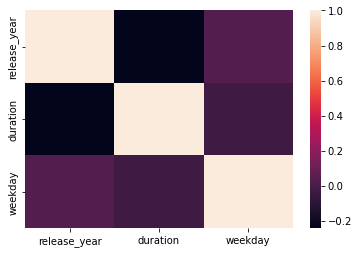

In [29]:
### checking correlation 
print(df.corr())
sns.heatmap(df.corr(),data=df)

#### There is no strong correlation 

In [30]:
df.duplicated().sum()

0

#### There is no duplicate values 

In [31]:
### splitting genres into 3 different segment through feature engineering 
df["genres"].str.split(",",expand=True)

,0,1,2
0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,Horror Movies,International Movies,Thrillers
2,Dramas,International Movies,Sports Movies
3,Comedies,None,None
4,British TV Shows,Docuseries,Science & Nature TV
...,...,...,...
7782,International TV Shows,Reality TV,None
7783,Anime Series,International TV Shows,None
7784,Dramas,Independent Movies,International Movies
7785,Comedies,Dramas,Independent Movies


In [32]:
df["genres1"]=df["genres"].str.split(",",expand=True)[0]
df["genres2"]=df["genres"].str.split(",",expand=True)[1]
df["genres3"]=df["genres"].str.split(",",expand=True)[2]

In [33]:
df

,type,title,director,country,date_added,release_year,rating,duration,genres,description,month_name,Day,weekday,genres1,genres2,genres3
0,TV Show,3%,Unidentified,Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,Friday,4,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,Movie,1920,Vikram Bhatt,India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,December,Friday,4,Horror Movies,International Movies,Thrillers
2,Movie,3 Heroines,Iman Brotoseno,Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,January,Saturday,5,Dramas,International Movies,Sports Movies
3,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,March,Tuesday,1,Comedies,None,None
4,TV Show,Blue Planet II,Unidentified,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,December,Monday,0,British TV Shows,Docuseries,Science & Nature TV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,TV Show,Blown Away,Unidentified,Canada,2019-07-12,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...,July,Friday,4,International TV Shows,Reality TV,None
7783,TV Show,Blue Exorcist,Unidentified,Japan,2020-09-01,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...,September,Tuesday,1,Anime Series,International TV Shows,None
7784,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"France, Belgium, Spain",2016-08-26,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ...",August,Friday,4,Dramas,Independent Movies,International Movies
7785,Movie,Blue Jasmine,Woody Allen,United States,2019-03-08,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...,March,Friday,4,Comedies,Dramas,Independent Movies


# Exploratory Data Analysis


In [34]:
sns.set(style="darkgrid")

In [35]:
df.sample(2)

,type,title,director,country,date_added,release_year,rating,duration,genres,description,month_name,Day,weekday,genres1,genres2,genres3
3118,Movie,Lucha: Playing the Impossible,Ana Quiroga,Argentina,2018-07-15,2016,TV-PG,98,"Documentaries, International Movies, Sports Mo...","Known simply as ""Lucha,"" field hockey player L...",July,Sunday,6,Documentaries,International Movies,Sports Movies
7663,Movie,Bhasmasur,Nishil Sheth,India,2019-01-29,2017,TV-14,74,"Dramas, Independent Movies, International Movies","In this heart-wrenching coming-of-age story, a...",January,Tuesday,1,Dramas,Independent Movies,International Movies


In [36]:
### Which type are mostly aired tv show or movie
df["type"].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

#### Movies are most aired than tv shows

United States     2555
India              923
Missing            507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64


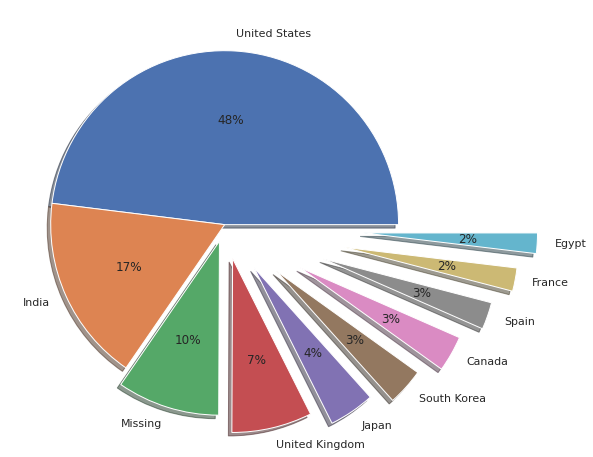

In [37]:
## Top 10 counties who produced movies and tv shows
a=df["country"].value_counts().head(10)
print(a)
plt.figure(figsize=(8,8))
plt.pie(a,labels=df["country"].value_counts().head(10).index,autopct="%0.0f%%",shadow=True,explode=[0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]);
plt.show()

#### Most of the movies and Tv shows on Netflix were produced by United States and India

In [38]:
#### Who are the top 10 directors who produced movies or tv shows
df["director"].value_counts().head(10)

Unidentified              2389
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Steven Spielberg            10
David Dhawan                 9
Name: director, dtype: int64

#### Most of the directors are unindentified as there were missing values so i have change it to unidentified

2018    1121
2017    1012
2019     996
2016     882
2020     868
2015     541
2014     334
2013     267
2012     219
2010     173
Name: release_year, dtype: int64


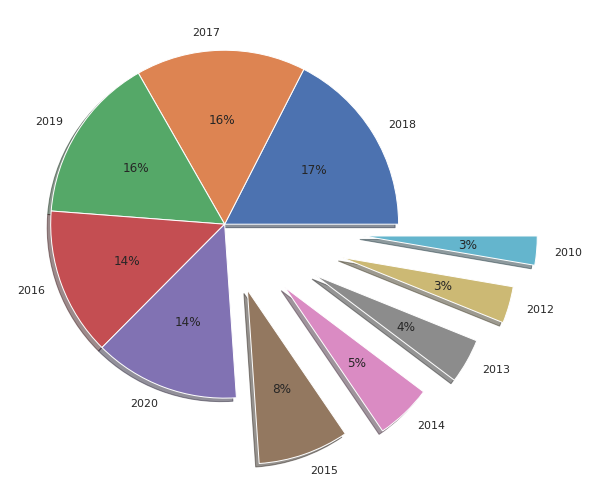

In [39]:
#### In which year most of the show and movies are released (top 10)
year=df["release_year"].value_counts().head(10)
print(year)
plt.figure(figsize=(8,8))
plt.pie(year,labels=df["release_year"].value_counts().head(10).index,autopct="%0.0f%%",shadow=True,explode=[0,0,0,0,0,0.4,0.5,0.6,0.7,0.8]);
plt.show()

#### In 2018 most of the Tv shows and Movies were Aired on netflix

TV-MA       2868
TV-14       1933
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


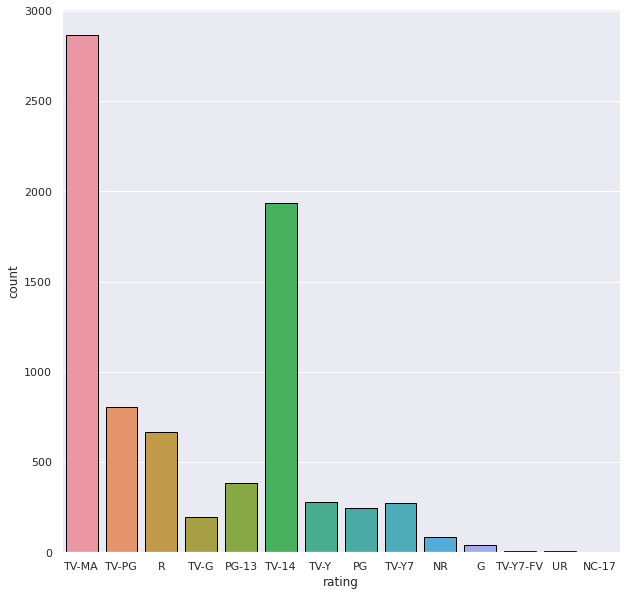

In [40]:
## Which ratings are mostly on tv shows and movies
print(df["rating"].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(x="rating",data=df,edgecolor="black");

December     833
October      785
January      757
November     738
March        679
September    619
August       618
April        601
July         600
May          543
June         542
February     472
Name: month_name, dtype: int64


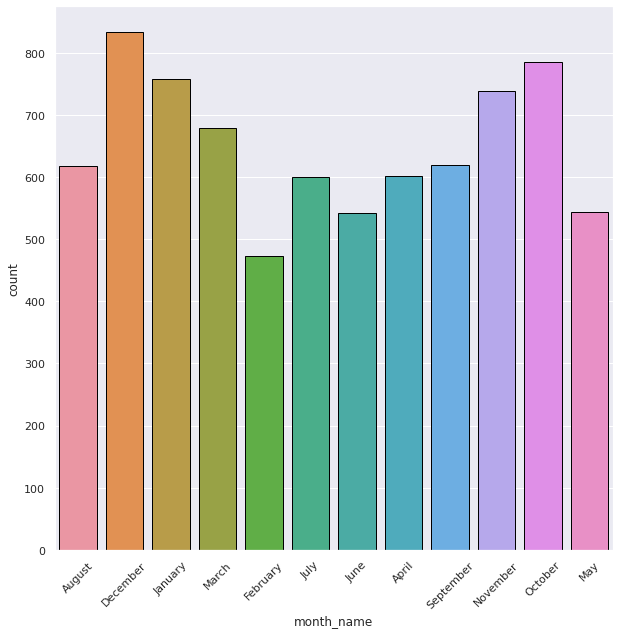

In [41]:
### In which month mostly movies or Tv shows are Aired 
print(df["month_name"].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(x="month_name",data=df,edgecolor="black")
plt.xticks(rotation=45);

#### In December month mostly movies and Tv shows are Aired 

Friday       2297
Thursday     1147
Tuesday      1070
Wednesday    1020
Monday        814
Saturday      731
Sunday        708
Name: Day, dtype: int64


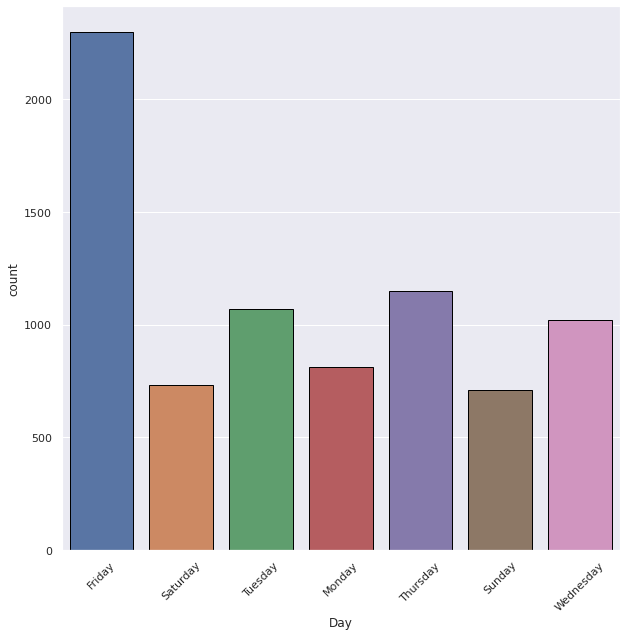

In [42]:
#### On which day mostly movies and Tv shows are released
print(df["Day"].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(x="Day",data=df,edgecolor="black")
plt.xticks(rotation=45);


#### Most Tv shows and Movies are released on Fridays

In [43]:
### what were the average duration of all the movies and Tv shows
df["duration"].mean()

69.12276871709258

In [44]:
### Which is the maximum and minimum duration movie
df[df["duration"]==df["duration"].max()]

,type,title,director,country,date_added,release_year,rating,duration,genres,description,month_name,Day,weekday,genres1,genres2,genres3
7741,Movie,Black Mirror: Bandersnatch,Unidentified,United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",December,Friday,4,Dramas,International Movies,Sci-Fi & Fantasy


In [45]:
df[df["duration"]==df["duration"].min()]

,type,title,director,country,date_added,release_year,rating,duration,genres,description,month_name,Day,weekday,genres1,genres2,genres3
4,TV Show,Blue Planet II,Unidentified,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,December,Monday,0,British TV Shows,Docuseries,Science & Nature TV
10,TV Show,BNA,Unidentified,Japan,2020-06-30,2020,TV-14,1,"Anime Series, International TV Shows","Morphed into a raccoon beastman, Michiru seeks...",June,Tuesday,1,Anime Series,International TV Shows,None
15,TV Show,Bo on the Go!,Unidentified,Canada,2019-03-21,2007,TV-Y,1,Kids' TV,Staying at home doesn't mean sitting still for...,March,Thursday,3,Kids' TV,None,None
17,TV Show,Bob Ross: Beauty Is Everywhere,Unidentified,Missing,2016-06-01,1991,TV-G,1,TV Shows,"""The Joy of Painting"" host Bob Ross brings his...",June,Wednesday,2,TV Shows,None,None
23,TV Show,Bobby Kennedy for President,Dawn Porter,Missing,2018-04-27,2018,TV-MA,1,Docuseries,Historic footage and leading voices of the era...,April,Friday,4,Docuseries,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,TV Show,Blood & Water,Unidentified,South Africa,2020-05-20,2020,TV-MA,1,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",May,Wednesday,2,International TV Shows,TV Dramas,TV Mysteries
7775,TV Show,Blood of Zeus,Unidentified,United States,2020-10-27,2020,TV-MA,1,Anime Series,"A commoner living in ancient Greece, Heron dis...",October,Tuesday,1,Anime Series,None,None
7777,TV Show,Blood Pact,Unidentified,Brazil,2018-10-10,2018,TV-MA,1,"Crime TV Shows, International TV Shows, TV Dramas",An ambitious TV reporter uses risky and ethica...,October,Wednesday,2,Crime TV Shows,International TV Shows,TV Dramas
7780,TV Show,Bloodride,Unidentified,Norway,2020-03-13,2020,TV-MA,1,"International TV Shows, TV Horror, TV Mysteries",The doomed passengers aboard a spectral bus he...,March,Friday,4,International TV Shows,TV Horror,TV Mysteries


In [46]:
#### find the weekday and weekend movies and tv shows of each month
df["weekday"].unique()

array([4, 5, 1, 0, 3, 6, 2])

Total weekdays release are month_name  weekday
April       4          153
            2          110
            0           74
            1           65
            3           55
August      4          148
            3          146
            1           89
            2           80
            0           71
December    4          204
            1          179
            3          100
            0           79
            2           66
February    4          169
            2           86
            3           70
            1           43
            0           29
January     4          224
            2          176
            1          108
            0          105
            3           62
July        4          153
            0           88
            2           75
            3           61
            1           48
June        4          163
            3          112
            0           60
            1           54
            2           47
March   

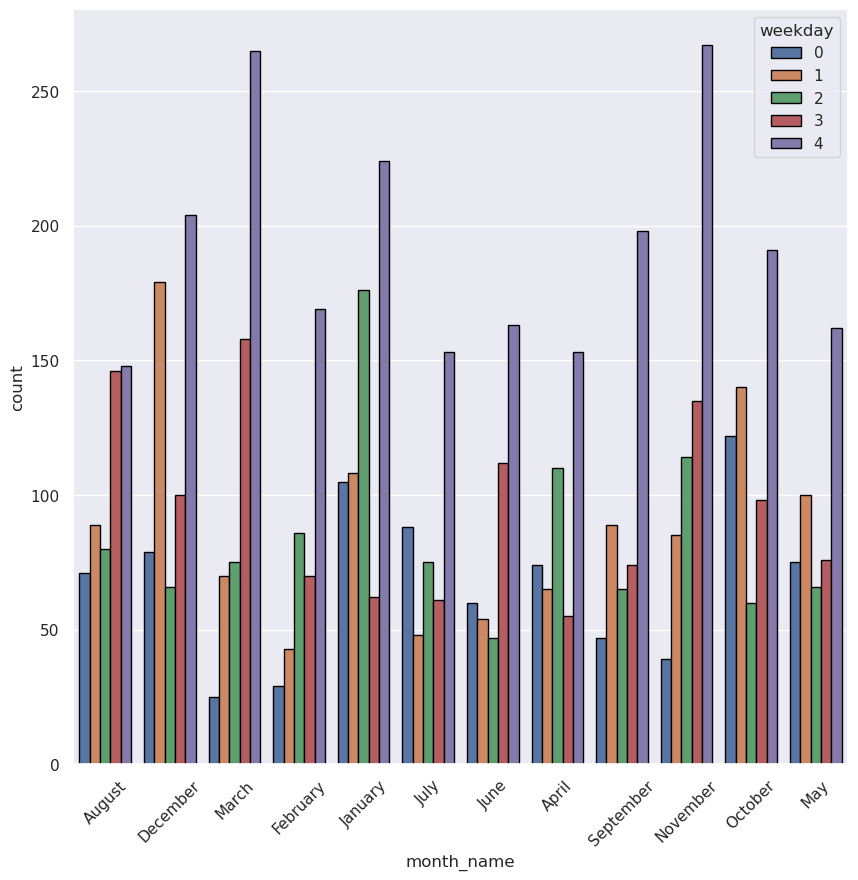

In [47]:
week_t=df[df["weekday"]<5]
weekend_t=df[df["weekday"]>=5]
print("Total weekdays release are",week_t.groupby("month_name")["weekday"].value_counts())
plt.figure(figsize=(10,10),dpi=100)
sns.countplot(x="month_name",hue="weekday",data=week_t,edgecolor="black")
plt.xticks(rotation=45);

In [48]:
week_t.groupby("month_name")["weekday"].sum().sort_values(ascending=False).reset_index()

,month_name,weekday
0,November,1786
1,March,1754
2,January,1542
3,December,1427
4,October,1318
5,August,1279
6,September,1233
7,June,1136
8,May,1108
9,February,1101


Total weekend release are month_name  weekday
December    6          113
July        6          105
October     6           96
December    5           92
June        5           83
October     5           78
April       5           78
September   6           75
            5           71
July        5           70
April       6           66
August      5           62
November    6           57
January     6           49
March       6           46
February    5           44
November    5           41
March       5           40
May         5           39
January     5           33
February    6           31
May         6           25
June        6           23
August      6           22
Name: weekday, dtype: int64


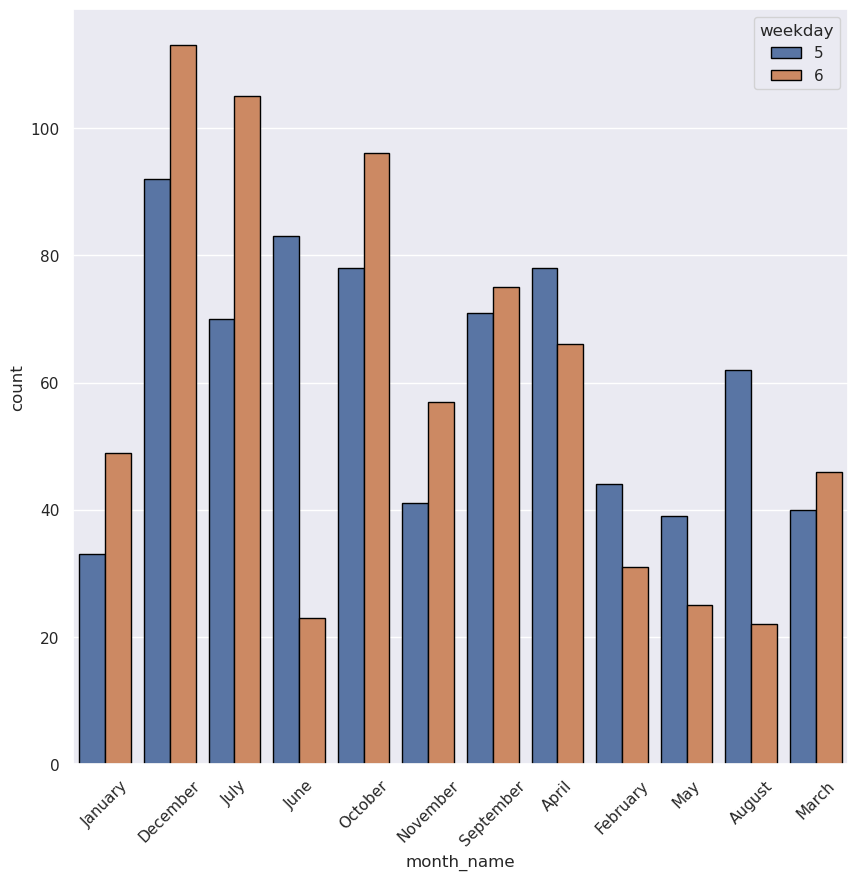

In [49]:
print("Total weekend release are",weekend_t.groupby("month_name")["weekday"].value_counts().sort_values(ascending=False))
plt.figure(figsize=(10,10),dpi=100)
sns.countplot(x="month_name",hue="weekday",data=weekend_t,edgecolor="black")
plt.xticks(rotation=45);

In [50]:
weekend_t.groupby("month_name")["weekday"].sum().sort_values(ascending=False).reset_index()

,month_name,weekday
0,December,1138
1,July,980
2,October,966
3,September,805
4,April,786
5,June,553
6,November,547
7,March,476
8,January,459
9,August,442


In [51]:
### Tv shows are mostly produced by which country
tv=df[df["type"]=="TV Show"]
print(tv.groupby("type")["country"].value_counts().head(10))


type     country       
TV Show  United States     705
         Missing           277
         United Kingdom    204
         Japan             157
         South Korea       147
         India              71
         Taiwan             68
         Canada             59
         Australia          46
         France             46
Name: country, dtype: int64


In [52]:
movie=df[df["type"]=="Movie"]
print(movie.groupby("type")["country"].value_counts().head(10))

type   country       
Movie  United States     1850
       India              852
       Missing            230
       United Kingdom     193
       Canada             118
       Egypt               89
       Spain               89
       Turkey              73
       Philippines         70
       France              69
Name: country, dtype: int64


#### United states produced most of the Tv shows and Movies where as India has also contributed a good amount of movies 

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           690
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         359
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 232
Docuseries                       194
Anime Series                     148
International Movies             114
TV Comedies                      110
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             37
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Classic & Cult TV                 21
Independent Movies                20
Anime Features                    19
Music & Musicals                  17
C

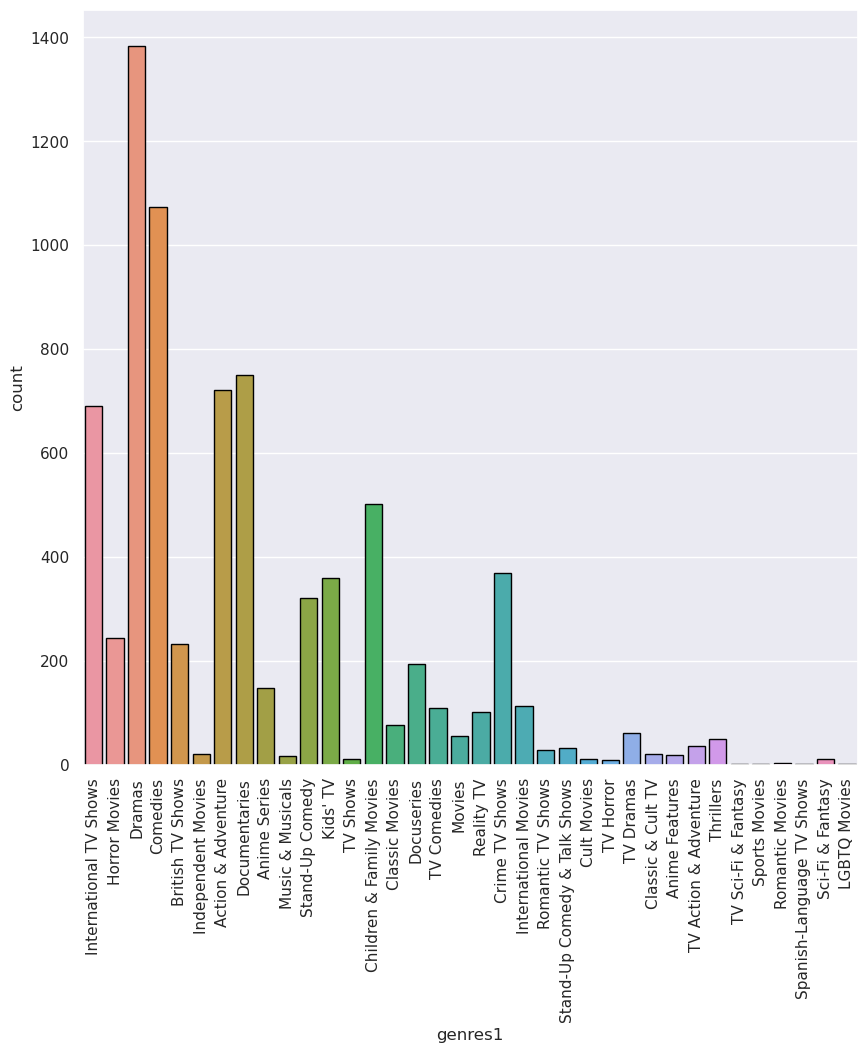

In [53]:
## Which genres are mostly Aired
print(df["genres1"].value_counts())
plt.figure(figsize=(10,10),dpi=100)
sns.countplot(x="genres1",data=df,edgecolor="black")
plt.xticks(rotation=90);

#### Dramas were mostly aired that means that were mostly liked by the audiences

In [54]:
### Mostly movies has mostly what type of rating
movie["rating"].value_counts()

TV-MA       1850
TV-14       1272
R            663
TV-PG        505
PG-13        386
PG           247
TV-Y         117
TV-G         111
TV-Y7         95
NR            79
G             39
TV-Y7-FV       5
UR             5
NC-17          3
Name: rating, dtype: int64

In [55]:
### Mostly Tv Shows has mostly what type of rating
tv["rating"].value_counts()

TV-MA       1018
TV-14        661
TV-PG        301
TV-Y7        176
TV-Y         163
TV-G          83
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

In [56]:
df.sample()

,type,title,director,country,date_added,release_year,rating,duration,genres,description,month_name,Day,weekday,genres1,genres2,genres3
5332,Movie,Starsky & Hutch,Todd Phillips,United States,2019-07-01,2004,PG-13,101,"Action & Adventure, Comedies",New undercover cop partners Starsky and Hutch ...,July,Monday,0,Action & Adventure,Comedies,None


<AxesSubplot:xlabel='duration', ylabel='weekday'>

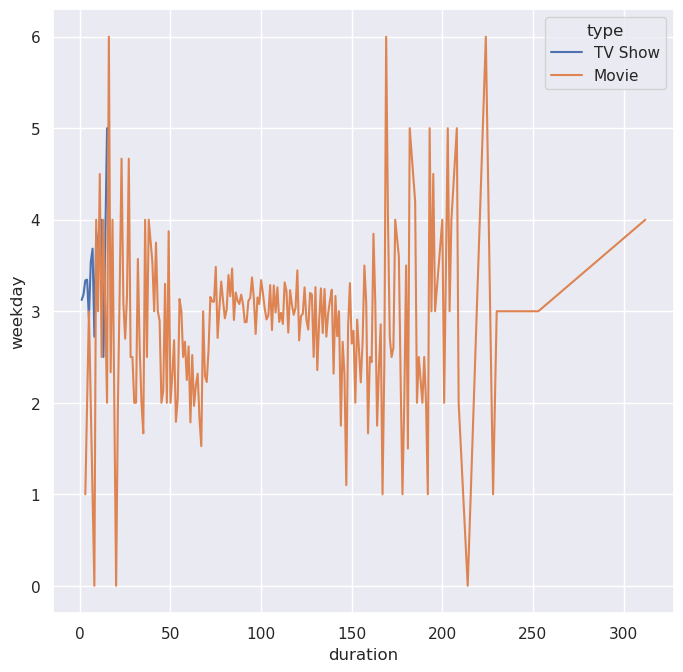

In [57]:
### What is the duration trend of the Movies and tv shows released on on Weekday and weekends
plt.figure(figsize=(8,8),dpi=100)
sns.lineplot(x="duration",y="weekday",hue="type",data=df,ci=None)

# Insights

* Drop 2 columns Show id and Cast as they were not providing very usefull information.
* Added Month name, day name, Weekdays and weekend Through feature engineering. 
* Split Genres into 3 parts to get more usefull information through feature engineering.
* There are more movies are aired than Tv shows.
* United states produced most of the Tv shows and Movies where as India has also contributed a good amount of movies.
* Most of the directors are unindentified as there were missing values so i have change it to unidentified.
* 2018 and 2017 is the year in which most of the movies and tv shows were released.
* December is the month in which mostly movies and tv shows releases and Friday is the weekday in which mostly Tv shows and Movies got release.
* Mostly Tv shows and movies are of TV-MA rating i.e most of the content is for Mature audience.
* In month of November and March highest no of Tv shows and movies were released on weekdays were as in month of December weekends highest no of Tv shows and movies were released.
* Dramas and Comedies genres are mostly released i.e this type of content is mostly liked by the audiences.
